In [3]:
import pandas as pd
import numpy as np
import os

In [4]:
DATASET_DIR = ''
dir_name = './'
file_name = 'BigCitiesHealth.csv'

In [5]:
file_path = os.path.join(DATASET_DIR,dir_name,file_name)
df = pd.read_csv(file_path)

df.info()

C:\Users\Post Scriptum\AppData\Local\Temp\ipykernel_21948\664991473.py:2: DtypeWarning: Columns (30) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 189979 entries, 0 to 189978
Data columns (total 31 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   metric_item_label                189979 non-null  object 
 1   metric_cat_label                 189979 non-null  object 
 2   metric_subcat_label              189979 non-null  object 
 3   metric_item_label_subtitle       189979 non-null  object 
 4   metric_cat_item_yaxis_label      189979 non-null  object 
 5   metric_source_desc_label_fn      189979 non-null  object 
 6   metric_source_desc_label_url_fn  189979 non-null  object 
 7   geo_label_city                   189979 non-null  object 
 8   geo_label_state                  188667 non-null  object 
 9   geo_label_citystate              189979 non-null  object 
 10  geo_fips_code                    188667 non-null  float64
 11  value                            189979 non-null  float64
 12  da

In [6]:
df["metric_label"] = df["metric_subcat_label"]+' | '+df["metric_item_label"] 

In [7]:
df["metric_label"].value_counts()

Deaths | Premature Death                                  6825
Deaths | Injury Deaths                                    6405
Deaths | Deaths from All Causes                           6244
Cancer | All Cancer Deaths                                6233
Cardiovascular Disease | Cardiovascular Disease Deaths    6195
                                                          ... 
Housing | Homeless, Total                                  266
Housing | Vacant Housing and Homelessness                  266
Housing | Homeless, Children                               256
Respiratory Infection | COVID-19 Vaccination, Adults        70
Respiratory Infection | COVID-19 Vaccination, Seniors       70
Name: metric_label, Length: 118, dtype: int64

1. race/sex stratified 된 데이터 체크

In [8]:
#컬럼 이름에 층위가 들어간 컬럼만 따로 분리
list(filter(lambda x: 'strata' in x,df.columns))

['geo_strata_region',
 'geo_strata_poverty',
 'geo_strata_Population',
 'geo_strata_PopDensity',
 'geo_strata_Segregation',
 'strata_race_label',
 'strata_sex_label',
 'strata_race_sex_label']

In [6]:

col_list = ['geo_strata_region',
 'geo_strata_poverty',
 'geo_strata_Population',
 'geo_strata_PopDensity',
 'geo_strata_Segregation']
for col in col_list:
    display(df[col].value_counts())

geo_strata_region
West         66810
South        62748
Midwest      40546
Northeast    18563
Name: count, dtype: int64

geo_strata_poverty
Less poor cities (<18% poor)    141688
Poorest cities (18%+ poor)       46979
Name: count, dtype: int64

geo_strata_Population
Smaller (<1.3 million)    134116
Largest (>1.3 million)     54550
Name: count, dtype: int64

geo_strata_PopDensity
Lower pop. density (<10k per sq mi)      152508
Highest pop. density (>10k per sq mi)     36158
Smaller (<1.3 million)                        1
Name: count, dtype: int64

geo_strata_Segregation
Less Segregated (<50%)      104633
Highly Segregated (50%+)     84034
Name: count, dtype: int64

In [7]:
col_list = ['strata_race_label',
 'strata_sex_label',
 'strata_race_sex_label']
for col in col_list:
    display(df[col].value_counts())

strata_race_label
All                              66201
White                            33779
Black                            33286
Hispanic                         28961
Asian/PI                         14895
Asian                             6568
American Indian/Alaska Native     6289
Name: count, dtype: int64

strata_sex_label
Both      123865
Male       35128
Female     30986
Name: count, dtype: int64

strata_race_sex_label
White Male         7579
Black Male         7502
White Female       6814
Black Female       6398
Hispanic Male      6323
Hispanic Female    4886
Asian/PI Male      3892
Asian/PI Female    3268
Name: count, dtype: int64

In [8]:
np.sum(df['strata_sex_label'].isna())

0

In [9]:
cond1 = (df['strata_race_label'] == 'All') & (df['strata_sex_label'] == 'Both')
np.sum(cond1)

46749

In [10]:
cond0 =(df['strata_sex_label'] == 'Both')
display(df.loc[cond0,'strata_race_label'].value_counts())

strata_race_label
All                              46749
White                            19386
Black                            19386
Hispanic                         17752
Asian/PI                          7735
Asian                             6568
American Indian/Alaska Native     6289
Name: count, dtype: int64

In [11]:
cond0 =(df['strata_race_label'] == 'All')
display(df.loc[cond0,'strata_sex_label'].value_counts())

strata_sex_label
Both      46749
Male       9832
Female     9620
Name: count, dtype: int64

In [12]:
cond0 = (df['strata_race_sex_label'].isna())
display(df.loc[cond0,'strata_race_label'].value_counts())
display(df.loc[cond0,'strata_sex_label'].value_counts())

strata_race_label
All                              66201
White                            19386
Black                            19386
Hispanic                         17752
Asian/PI                          7735
Asian                             6568
American Indian/Alaska Native     6289
Name: count, dtype: int64

strata_sex_label
Both      123865
Male        9832
Female      9620
Name: count, dtype: int64

In [13]:
cond0 = (~df['strata_race_sex_label'].isna())
display(df.loc[cond0,['strata_race_sex_label','strata_race_label']].value_counts())
display(df.loc[cond0,['strata_race_sex_label','strata_sex_label']].value_counts())

strata_race_sex_label  strata_race_label
White Male             White                7579
Black Male             Black                7502
White Female           White                6814
Black Female           Black                6398
Hispanic Male          Hispanic             6323
Hispanic Female        Hispanic             4886
Asian/PI Male          Asian/PI             3892
Asian/PI Female        Asian/PI             3268
Name: count, dtype: int64

strata_race_sex_label  strata_sex_label
White Male             Male                7579
Black Male             Male                7502
White Female           Female              6814
Black Female           Female              6398
Hispanic Male          Male                6323
Hispanic Female        Female              4886
Asian/PI Male          Male                3892
Asian/PI Female        Female              3268
Name: count, dtype: int64

2. geo_strata 관련 column들 확인

In [14]:
df['geo_label_city'].unique()

array(['Cleveland', 'Oakland', 'San Francisco', 'Long Beach', 'Dallas',
       'Las Vegas', 'San Antonio', 'Columbus', 'Seattle', 'New York City',
       'Tucson', 'Phoenix', 'Fort Worth', 'Indianapolis', 'Oklahoma City',
       'San Diego', 'Houston', 'Boston', 'Philadelphia', 'Denver',
       'Charlotte', 'Portland', 'Kansas City', 'Los Angeles',
       'Washington', 'Detroit', 'Chicago', 'Milwaukee', 'San Jose',
       'Austin', 'Memphis', 'Louisville', 'Baltimore', 'Minneapolis',
       'El Paso', 'U.S. Total'], dtype=object)

In [15]:
col_list = ['geo_strata_region',
 'geo_strata_poverty',
 'geo_strata_Population',
 'geo_strata_PopDensity',
 'geo_strata_Segregation']
df[['geo_label_city']+col_list].value_counts()

geo_label_city  geo_strata_region  geo_strata_poverty            geo_strata_Population   geo_strata_PopDensity                  geo_strata_Segregation  
New York City   Northeast          Less poor cities (<18% poor)  Largest (>1.3 million)  Highest pop. density (>10k per sq mi)  Highly Segregated (50%+)    6535
Houston         South              Poorest cities (18%+ poor)    Largest (>1.3 million)  Lower pop. density (<10k per sq mi)    Highly Segregated (50%+)    6431
Los Angeles     West               Less poor cities (<18% poor)  Largest (>1.3 million)  Lower pop. density (<10k per sq mi)    Highly Segregated (50%+)    6372
Philadelphia    Northeast          Poorest cities (18%+ poor)    Largest (>1.3 million)  Highest pop. density (>10k per sq mi)  Highly Segregated (50%+)    6310
San Diego       West               Less poor cities (<18% poor)  Largest (>1.3 million)  Lower pop. density (<10k per sq mi)    Less Segregated (<50%)      6251
Chicago         Midwest            Less po

In [16]:
len(df[['geo_label_city']+col_list].value_counts()), len(df['geo_label_city'].value_counts())


(36, 36)

3. value_ci 관련 col 확인

In [17]:
df['value_ci_flag_yesno'].value_counts()

value_ci_flag_yesno
yes    118682
no      71297
Name: count, dtype: int64

In [18]:
np.sum(df['value_ci_flag_yesno'].isna())

0

In [19]:
list(filter(lambda x: 'ci' in x,df.columns))

['geo_label_city',
 'geo_label_citystate',
 'value_ci_flag_yesno',
 'value_95_ci_low',
 'value_95_ci_high',
 'value_90_ci_low',
 'value_90_ci_high']

In [191]:
df[['value_90_ci_low']].info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 189979 entries, 0 to 189978
Data columns (total 1 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   value_90_ci_low  0 non-null      float64
dtypes: float64(1)
memory usage: 1.4 MB


In [192]:
df[['value_ci_flag_yesno',
    'value_95_ci_low',
 'value_95_ci_high']]

,value_ci_flag_yesno,value_95_ci_low,value_95_ci_high
0,yes,195.006700,225.194591
1,yes,124.494012,211.553695
2,yes,92.047403,101.613187
3,yes,88.474786,122.786969
4,yes,275.648062,320.086062
...,...,...,...
189974,no,NaN,NaN
189975,no,NaN,NaN
189976,no,NaN,NaN
189977,no,NaN,NaN


In [193]:
#flag = yes 일 경우 4가지 정보 모두 존재
# no 일 경우 최소 1가지 이상 공백
col_list = ['value_95_ci_low',
 'value_95_ci_high']

cond1 = df[col_list].isna().all(axis=1)
cond2 = df['value_ci_flag_yesno'] == 'no'


cond3 = df[col_list].isna().any(axis=1)
cond4 = df['value_ci_flag_yesno'] == 'yes'

# np.sum(cond1 != cond2), np.sum(cond1), np.sum(cond2)

np.sum((~cond3) != cond4), np.sum(~cond3), np.sum(cond4)

(12, 118670, 118682)

In [194]:
len(df.loc[cond1,'metric_label'].unique())

117

In [195]:
# CI가 존재하는 컬럼 = 53개
len(df.loc[~cond1,'metric_label'].unique())

53

In [196]:
df.loc[~cond1,'metric_label'].value_counts()

Deaths | Premature Death                                  6825
Deaths | Injury Deaths                                    6392
Deaths | Deaths from All Causes                           6231
Cancer | All Cancer Deaths                                6220
Cardiovascular Disease | Cardiovascular Disease Deaths    6182
Cardiovascular Disease | Heart Disease Deaths             6125
Diabetes and Obesity | Diabetes Deaths                    5476
Cancer | Lung Cancer Deaths                               5475
Substance Use | Drug Overdose Deaths                      5450
Mental Health | Suicide                                   5137
Deaths | Motor Vehicle Deaths                             5112
Cancer | Colorectal Cancer Deaths                         5044
Deaths | Gun Deaths (Firearms)                            4904
Respiratory Infection | Pneumonia or Influenza Deaths     4827
Substance Use | Opioid Overdose Deaths                    4814
Crime Incidents | Homicides                            

In [197]:
metric_w_ci = set(df.loc[~cond1,'metric_label'].unique())
metric_wo_ci = set(df.loc[cond1,'metric_label'].unique())

metric_w_ci.difference(metric_wo_ci)

df[df['metric_label'] == 'Deaths | Premature Death'][col_list]

,value_95_ci_low,value_95_ci_high
53717,12017.425830,15242.289810
53718,2826.211311,3559.397128
53719,3489.883205,4476.346755
53720,4595.894356,5792.166134
53721,2505.775241,5565.075217
...,...,...
60537,4241.048298,5255.674520
60538,5524.349193,6073.323131
60539,4977.678608,6442.037655
60540,5699.690746,6396.834812


In [198]:
len(metric_wo_ci.difference(metric_w_ci)), len(metric_wo_ci)

(65, 117)

In [199]:
metirc_null_ci = sorted(list(metric_wo_ci.difference(metric_w_ci)))

for col in metirc_null_ci[:20]:
    cond = df['metric_label'] == col
    print(col.ljust(75),f"     : {np.sum(cond):>10}")

Active Transportation | Riding Bike to Work                                      :        468
Active Transportation | Walking to Work                                          :       2218
Air Pollution | Hazardous Air Quality                                            :        467
Air Pollution | Poor Air Quality                                                 :        467
Crime Incidents | Violent Crime                                                  :        454
Deaths | Police Killings                                                         :       1495
Deaths | Racial Disparity in Police Killings                                     :        455
Disability | People with Disabilities                                            :       2743
Education | College Graduates                                                    :       2743
Education | Preschool Enrollment                                                 :        468
Food Access | Limited Supermarket Access                    

In [200]:
for col in metirc_null_ci[20:40]:
    cond = df['metric_label'] == col
    print(col.ljust(75),f"     : {np.sum(cond):>10}")

Housing | Renters vs. Owners                                                     :       2743
Housing | Vacant Housing Units                                                   :        468
Housing | Vacant Housing and Homelessness                                        :        266
Income Inequality | Household Income Inequality                                  :        468
Income Inequality | Income Inequality                                            :        468
Income | Households with Higher-Incomes                                          :        468
Income | Per-capita Household Income                                             :       2743
Income | Poverty and Near Poverty in All Ages                                    :        468
Income | Poverty in All Ages                                                     :       2743
Income | Poverty in Children                                                     :       2743
Income-related | Excessive Housing Cost                     

In [201]:
for col in metirc_null_ci[40:]:
    cond = df['metric_label'] == col
    print(col.ljust(75),f"     : {np.sum(cond):>10}")

Lead Poisoning | Child Lead Testing                                              :        361
Lead Poisoning | Housing Lead Risk                                               :        468
Life Expectancy at Birth | Life Expectancy                                       :       5004
Population | Children                                                            :        468
Population | Population Density                                                  :        455
Population | Seniors                                                             :        468
Population | Single-Parent Families                                              :       2218
Race/Ethnicity | Minority Population                                             :        468
Racial Segregation Indices | Racial Segregation, White and Asian                 :        468
Racial Segregation Indices | Racial Segregation, White and Black                 :        468
Racial Segregation Indices | Racial Segregation, White and H

### U.S. Total 분리

In [202]:
df['geo_label_city'].value_counts()

New York City    6535
Houston          6431
Los Angeles      6372
Philadelphia     6310
San Diego        6251
Chicago          6210
San Francisco    6121
Las Vegas        5849
Boston           5718
Oakland          5676
Dallas           5655
Fort Worth       5628
Seattle          5507
Phoenix          5437
Charlotte        5381
San Antonio      5349
Washington       5264
Portland         5219
Long Beach       5216
San Jose         5206
Austin           5198
Detroit          5160
Denver           5157
Cleveland        5113
Baltimore        5101
Oklahoma City    5030
Indianapolis     4916
Columbus         4907
Milwaukee        4881
Kansas City      4848
Tucson           4799
Memphis          4631
El Paso          4553
Louisville       4527
Minneapolis      4511
U.S. Total       1312
Name: geo_label_city, dtype: int64

In [203]:
cond0 = df['geo_label_city'] == 'U.S. Total'

df_US = df.loc[cond0].copy()
df_city = df.loc[~cond0].copy()

display(df_US.info())
display(df_city.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1312 entries, 5718 to 189943
Data columns (total 32 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   metric_item_label                1312 non-null   object 
 1   metric_cat_label                 1312 non-null   object 
 2   metric_subcat_label              1312 non-null   object 
 3   metric_item_label_subtitle       1312 non-null   object 
 4   metric_cat_item_yaxis_label      1312 non-null   object 
 5   metric_source_desc_label_fn      1312 non-null   object 
 6   metric_source_desc_label_url_fn  1312 non-null   object 
 7   geo_label_city                   1312 non-null   object 
 8   geo_label_state                  0 non-null      object 
 9   geo_label_citystate              1312 non-null   object 
 10  geo_fips_code                    0 non-null      float64
 11  value                            1312 non-null   float64
 12  date_label     

None

<class 'pandas.core.frame.DataFrame'>
Int64Index: 188667 entries, 0 to 189978
Data columns (total 32 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   metric_item_label                188667 non-null  object 
 1   metric_cat_label                 188667 non-null  object 
 2   metric_subcat_label              188667 non-null  object 
 3   metric_item_label_subtitle       188667 non-null  object 
 4   metric_cat_item_yaxis_label      188667 non-null  object 
 5   metric_source_desc_label_fn      188667 non-null  object 
 6   metric_source_desc_label_url_fn  188667 non-null  object 
 7   geo_label_city                   188667 non-null  object 
 8   geo_label_state                  188667 non-null  object 
 9   geo_label_citystate              188667 non-null  object 
 10  geo_fips_code                    188667 non-null  float64
 11  value                            188667 non-null  float64
 12  da

None

In [204]:
cond1 = (df_city['strata_race_label'] == 'All') & (df_city['strata_sex_label'] == 'Both')
np.sum(cond1)

45437

In [205]:
col_list = ['value_95_ci_low',
 'value_95_ci_high',
 'value_90_ci_low',
 'value_90_ci_high']

cond1 = df_city[col_list].isna().all(axis=1)
cond2 = df_city['value_ci_flag_yesno'] == 'no'

np.sum(cond1 != cond2), np.sum(cond1), np.sum(cond2)

(0, 70183, 70183)

In [206]:
df_city.loc[~cond1,'metric_label'].value_counts()

Deaths | Premature Death                                  6825
Deaths | Injury Deaths                                    6392
Deaths | Deaths from All Causes                           6231
Cancer | All Cancer Deaths                                6220
Cardiovascular Disease | Cardiovascular Disease Deaths    6182
Cardiovascular Disease | Heart Disease Deaths             6125
Diabetes and Obesity | Diabetes Deaths                    5476
Cancer | Lung Cancer Deaths                               5475
Substance Use | Drug Overdose Deaths                      5450
Mental Health | Suicide                                   5137
Deaths | Motor Vehicle Deaths                             5112
Cancer | Colorectal Cancer Deaths                         5044
Deaths | Gun Deaths (Firearms)                            4904
Respiratory Infection | Pneumonia or Influenza Deaths     4827
Substance Use | Opioid Overdose Deaths                    4814
Crime Incidents | Homicides                            

In [207]:
len(df_city.loc[~cond1,'metric_label'].value_counts())

53

In [208]:
metric_w_ci = set(df_city.loc[~cond1,'metric_label'].unique()) # 최소 한개에 대해 CI 비어있는
metric_wo_ci = set(df_city.loc[cond1,'metric_label'].unique()) # 모든 레코드에 대해 CI 비어있는

metric_w_ci.difference(metric_wo_ci)

{'Births | Low Birthweight',
 'Births | Prenatal Care',
 'Births | Preterm Births',
 'Births | Teen Births',
 'Cancer | All Cancer Deaths',
 'Cancer | Breast Cancer Deaths',
 'Cancer | Colorectal Cancer Deaths',
 'Cancer | Lung Cancer Deaths',
 'Cancer | Prostate Cancer Deaths',
 'Cardiovascular Disease | Cardiovascular Disease Deaths',
 'Cardiovascular Disease | Heart Disease Deaths',
 'Cardiovascular Disease | High Blood Pressure',
 'Crime Incidents | Homicides',
 'Deaths | Deaths from All Causes',
 'Deaths | Gun Deaths (Firearms)',
 'Deaths | Infant Deaths',
 'Deaths | Injury Deaths',
 'Deaths | Maternal Deaths',
 'Deaths | Motor Vehicle Deaths',
 'Deaths | Premature Death',
 'Diabetes and Obesity | Adult Obesity',
 'Diabetes and Obesity | Diabetes',
 'Diabetes and Obesity | Diabetes Deaths',
 'Mental Health | Adult Mental Distress',
 'Mental Health | Suicide',
 'Oral Health | Dental Care',
 'Physical Activity | Adult Physical Inactivity',
 'Respiratory Infection | COVID-19 Deaths',

In [209]:
metirc_full_ci = sorted(list(metric_w_ci.difference(metric_wo_ci)))

for col in metirc_full_ci[:20]:
    cond = df_city['metric_label'] == col
    print(col.ljust(75),f"     : {np.sum(cond):>10}")

Births | Low Birthweight                                                         :       2275
Births | Prenatal Care                                                           :       2185
Births | Preterm Births                                                          :       1225
Births | Teen Births                                                             :       2235
Cancer | All Cancer Deaths                                                       :       6220
Cancer | Breast Cancer Deaths                                                    :       1773
Cancer | Colorectal Cancer Deaths                                                :       5044
Cancer | Lung Cancer Deaths                                                      :       5475
Cancer | Prostate Cancer Deaths                                                  :       1713
Cardiovascular Disease | Cardiovascular Disease Deaths                           :       6182
Cardiovascular Disease | Heart Disease Deaths               

In [210]:
for col in metirc_full_ci[20:]:
    cond = df_city['metric_label'] == col
    print(col.ljust(75),f"     : {np.sum(cond):>10}")

Diabetes and Obesity | Adult Obesity                                             :        455
Diabetes and Obesity | Diabetes                                                  :        455
Diabetes and Obesity | Diabetes Deaths                                           :       5476
Mental Health | Adult Mental Distress                                            :        455
Mental Health | Suicide                                                          :       5137
Oral Health | Dental Care                                                        :        455
Physical Activity | Adult Physical Inactivity                                    :        455
Respiratory Infection | COVID-19 Deaths                                          :       1396
Respiratory Infection | Pneumonia or Influenza Deaths                            :       4827
Sexually Transmitted Disease | HIV-Related Deaths                                :       3368
Substance Use | Adult Binge Drinking                        

In [211]:
len(metirc_full_ci)

34

In [212]:
metirc_null_ci = sorted(list(metric_wo_ci.difference(metric_w_ci)))
print(len(metirc_null_ci))

for col in metirc_null_ci:
    cond = df['metric_label'] == col
    print(col.ljust(75),f"     : {np.sum(cond):>10}")

65
Active Transportation | Riding Bike to Work                                      :        468
Active Transportation | Walking to Work                                          :       2218
Air Pollution | Hazardous Air Quality                                            :        467
Air Pollution | Poor Air Quality                                                 :        467
Crime Incidents | Violent Crime                                                  :        454
Deaths | Police Killings                                                         :       1495
Deaths | Racial Disparity in Police Killings                                     :        455
Disability | People with Disabilities                                            :       2743
Education | College Graduates                                                    :       2743
Education | Preschool Enrollment                                                 :        468
Food Access | Limited Supermarket Access                 

In [213]:
metirc_null_ci = sorted(list(metric_wo_ci.difference(metric_w_ci)))

for col in metirc_null_ci[20:]:
    cond = df['metric_label'] == col
    print(col.ljust(75),f"     : {np.sum(cond):>10}")

Housing | Renters vs. Owners                                                     :       2743
Housing | Vacant Housing Units                                                   :        468
Housing | Vacant Housing and Homelessness                                        :        266
Income Inequality | Household Income Inequality                                  :        468
Income Inequality | Income Inequality                                            :        468
Income | Households with Higher-Incomes                                          :        468
Income | Per-capita Household Income                                             :       2743
Income | Poverty and Near Poverty in All Ages                                    :        468
Income | Poverty in All Ages                                                     :       2743
Income | Poverty in Children                                                     :       2743
Income-related | Excessive Housing Cost                     

In [214]:
table = pd.pivot_table(df_city, index=["geo_label_city","date_label"], values='value', columns=['metric_label'])

In [215]:
table[metirc_null_ci]

metric_label               Active Transportation | Riding Bike to Work  \
geo_label_city date_label                                                
Austin         2010                                           1.458997   
               2011                                           1.458997   
               2012                                           1.458997   
               2013                                           1.326730   
               2014                                           1.326730   
...                                                                ...   
Washington     2018                                           3.316120   
               2019                                           3.316120   
               2020                                           3.316120   
               2021                                           3.316120   
               2022                                           3.316120   

metric_label               Active Transportation | Walking to Work  \
geo_label_city date_label                                            
Austin         2010                                       2.506039   
               2011                                       2.506039   
               2012                                       2.506039   
               2013                                       2.184400   
               2014                                       2.184400   
...                                                            ...   
Washington     2018                                      10.525489   
               2019                                      10.525489   
               2020                                      10.525489   
               2021                                      10.525489   
               2022                                      10.525489   

metric_label               Air Pollution | Hazardous Air Quality  \
geo_label_city date_label                                          
Austin         2010                                     2.191781   
               2011                                     3.835616   
               2012                                     2.185792   
               2013                                     1.095890   
               2014                                     0.000000   
...                                                          ...   
Washington     2018                                     1.643836   
               2019                                     1.369863   
               2020                                     0.273224   
               2021                                     2.191781   
               2022                                     1.877934   

metric_label               Air Pollution | Poor Air Quality  \
geo_label_city date_label                                     
Austin         2010                               25.479452   
               2011                               38.356164   
               2012                               31.967213   
               2013                               31.780822   
               2014                               31.780822   
...                                                     ...   
Washington     2018                               35.616438   
               2019                               33.698630   
               2020                               14.207650   
               2021                               30.958904   
               2022                               28.169014   

metric_label               Crime Incidents | Violent Crime  \
geo_label_city date_label                                    
Austin         2010                             475.945298   
               2011                             430.099799   
               2012                             408.812092   
               2013                             363.486115   
               2014                             3

In [216]:
null_count = table.groupby(by=["geo_label_city", "date_label"])[metirc_null_ci].count()

null_count 
# null_count_city = 

metric_label               Active Transportation | Riding Bike to Work  \
geo_label_city date_label                                                
Austin         2010                                                  1   
               2011                                                  1   
               2012                                                  1   
               2013                                                  1   
               2014                                                  1   
...                                                                ...   
Washington     2018                                                  1   
               2019                                                  1   
               2020                                                  1   
               2021                                                  1   
               2022                                                  1   

metric_label               Active Transportation | Walking to Work  \
geo_label_city date_label                                            
Austin         2010                                              1   
               2011                                              1   
               2012                                              1   
               2013                                              1   
               2014                                              1   
...                                                            ...   
Washington     2018                                              1   
               2019                                              1   
               2020                                              1   
               2021                                              1   
               2022                                              1   

metric_label               Air Pollution | Hazardous Air Quality  \
geo_label_city date_label                                          
Austin         2010                                            1   
               2011                                            1   
               2012                                            1   
               2013                                            1   
               2014                                            1   
...                                                          ...   
Washington     2018                                            1   
               2019                                            1   
               2020                                            1   
               2021                                            1   
               2022                                            1   

metric_label               Air Pollution | Poor Air Quality  \
geo_label_city date_label                                     
Austin         2010                                       1   
               2011                                       1   
               2012                                       1   
               2013                                       1   
               2014                                       1   
...                                                     ...   
Washington     2018                                       1   
               2019                                       1   
               2020                                       1   
               2021                                       1   
               2022                                       1   

metric_label               Crime Incidents | Violent Crime  \
geo_label_city date_label                                    
Austin         2010                                      1   
               2011                                      1   
               2012                                      1   
               2013                                      1   
               2014                              

In [217]:
df_city[col_list].isna().astype(int)

,value_95_ci_low,value_95_ci_high,value_90_ci_low,value_90_ci_high
0,0,0,1,1
1,0,0,1,1
2,0,0,1,1
3,0,0,1,1
4,0,0,1,1
...,...,...,...,...
189974,1,1,1,1
189975,1,1,1,1
189976,1,1,1,1
189977,1,1,1,1


In [218]:
df_city

,metric_item_label,metric_cat_label,metric_subcat_label,metric_item_label_subtitle,metric_cat_item_yaxis_label,metric_source_desc_label_fn,metric_source_desc_label_url_fn,geo_label_city,geo_label_state,geo_label_citystate,...,value_90_ci_high,geo_strata_region,geo_strata_poverty,geo_strata_Population,geo_strata_PopDensity,geo_strata_Segregation,strata_race_label,strata_sex_label,strata_race_sex_label,metric_label
0,All Cancer Deaths,Chronic Health Conditions,Cancer,"Deaths from all types of cancer (per 100,000 p...","Per 100,000","National Vital Statistics System (NVSS), Cente...",https://www.cdc.gov/nchs/nvss/index.htm,Cleveland,OH,"Cleveland, OH",...,NaN,Midwest,Poorest cities (18%+ poor),Smaller (<1.3 million),Lower pop. density (<10k per sq mi),Highly Segregated (50%+),Black,Female,Black Female,Cancer | All Cancer Deaths
1,All Cancer Deaths,Chronic Health Conditions,Cancer,"Deaths from all types of cancer (per 100,000 p...","Per 100,000","National Vital Statistics System (NVSS), Cente...",https://www.cdc.gov/nchs/nvss/index.htm,Oakland,CA,"Oakland, CA",...,NaN,West,Less poor cities (<18% poor),Smaller (<1.3 million),Lower pop. density (<10k per sq mi),Less Segregated (<50%),Hispanic,Male,Hispanic Male,Cancer | All Cancer Deaths
2,All Cancer Deaths,Chronic Health Conditions,Cancer,"Deaths from all types of cancer (per 100,000 p...","Per 100,000","National Vital Statistics System (NVSS), Cente...",https://www.cdc.gov/nchs/nvss/index.htm,San Francisco,CA,"San Francisco, CA",...,NaN,West,Less poor cities (<18% poor),Smaller (<1.3 million),Highest pop. density (>10k per sq mi),Less Segregated (<50%),All,Female,NaN,Cancer | All Cancer Deaths
3,All Cancer Deaths,Chronic Health Conditions,Cancer,"Deaths from all types of cancer (per 100,000 p...","Per 100,000","National Vital Statistics System (NVSS), Cente...",https://www.cdc.gov/nchs/nvss/index.htm,Long Beach,CA,"Long Beach, CA",...,NaN,West,Less poor cities (<18% poor),Smaller (<1.3 million),Lower pop. density (<10k per sq mi),Highly Segregated (50%+),Hispanic,Female,Hispanic Female,Cancer | All Cancer Deaths
4,All Cancer Deaths,Chronic Health Conditions,Cancer,"Deaths from all types of cancer (per 100,000 p...","Per 100,000","National Vital Statistics System (NVSS), Cente...",https://www.cdc.gov/nchs/nvss/index.htm,Cleveland,OH,"Cleveland, OH",...,NaN,Midwest,Poorest cities (18%+ poor),Smaller (<1.3 million),Lower pop. density (<10k per sq mi),Highly Segregated (50%+),Black,Male,Black Male,Cancer | All Cancer Deaths
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189974,"Racial Segregation, White and Hispanic",Social and Economic Factors,Racial Segregation Indices,Residential segregation of white non-Hispanic ...,Lower is better,"American Community Survey, U.S. Census Bureau",https://www.census.gov/programs-surveys/acs,Chicago,IL,"Chicago, IL",...,NaN,Midwest,Less poor cities (<18% poor),Largest (>1.3 million),Highest pop. density (>10k per sq mi),Highly Segregated (50%+),All,Both,NaN,Racial Segregation Indices | Racial Segregatio...
189975,"Racial Segregation, White and Hispanic",Social and Economic Factors,Racial Segregation Indices,Residential segregation of white non-Hispanic ...,Lower is better,"American Community Survey, U.S. Census Bureau",https://www.census.gov/programs-surveys/acs,Charlotte,NC,"Charlotte, NC",...,NaN,South,Less poor cities (<18% poor),Smaller (<1.3 million),Lower pop. density (<10k per sq mi),Less Segregated (<50%),All,Both,NaN,Racial Segregation Indices | Racial Segregatio...
189976,"Racial Segregation, White and Hispanic",Social and Economic Factors,Racial Segregation Indices,Residential segregation of white non-Hispanic ...,Lower is better,"American Community Survey, U.S. Census Bureau",https://www.census.gov/programs-surveys/acs,Boston,MA,"Boston, MA",...,NaN,Northeast,Less poor cities (<18% poor),Smaller (<1.3 million),Highest pop. density (>10k per sq mi),Highly Segregated (50%+),All,Both,NaN,Racial Segreg

In [219]:
col_list = ["value_95_ci_low", "value_95_ci_high"]

In [220]:
df.groupby("date_label")[col_list].count().rsub(df.groupby("date_label")[col_list].size(), axis=0)

,value_95_ci_low,value_95_ci_high
date_label,,
2010,3870,3870
2011,4281,4280
2012,4632,4631
2013,5690,5689
2014,5932,5931
2015,5799,5798
2016,6041,6040
2017,5792,5791
2018,6050,6049


In [83]:
df.groupby("geo_label_city")[col_list].count().rsub(df.groupby("geo_label_city")[col_list].size(), axis=0)

,value_95_ci_low,value_95_ci_high
geo_label_city,,
Austin,1942,1942
Baltimore,2033,2033
Boston,1987,1987
Charlotte,2069,2069
Chicago,2098,2098
Cleveland,2068,2068
Columbus,1903,1903
Dallas,2091,2091
Denver,1926,1926


In [221]:
df.groupby("date_label")[col_list].count()

,value_95_ci_low,value_95_ci_high
date_label,,
2010,7882,7882
2011,9321,9322
2012,8116,8117
2013,9635,9636
2014,8383,8384
2015,9915,9916
2016,8716,8717
2017,10320,10321
2018,8781,8782


In [222]:
df.groupby("date_label")[col_list].size()

date_label
2010    11752
2011    13602
2012    12748
2013    15325
2014    14315
2015    15714
2016    14757
2017    16112
2018    14831
2019    16096
2020    15389
2021    15008
2022    14330
dtype: int64

In [257]:
#CI가 null인것 구하기 위한 함수
def get_nullcount(df,groupby,cols=None):
    grouped = df.groupby(groupby)
    if cols:
        grouped = grouped[cols]
    return grouped.count().rsub(grouped.size(),axis=0)

#CI가 null인것/전체 비율 구하기 위한 함수
def get_nullprop(df,groupby, cols=None):
    grouped = df.groupby(groupby)
    if cols:
        grouped = grouped[cols]
    count = grouped.size().to_frame()
    count = pd.concat([count] * 2, axis=1)
    count.columns = ["value_95_ci_high", "value_95_ci_low"]
    return count.rdiv(get_nullcount(df,groupby,cols=cols))

[Text(0.5, 0, 'City'), Text(0, 0.5, 'Proportion of null CI')]

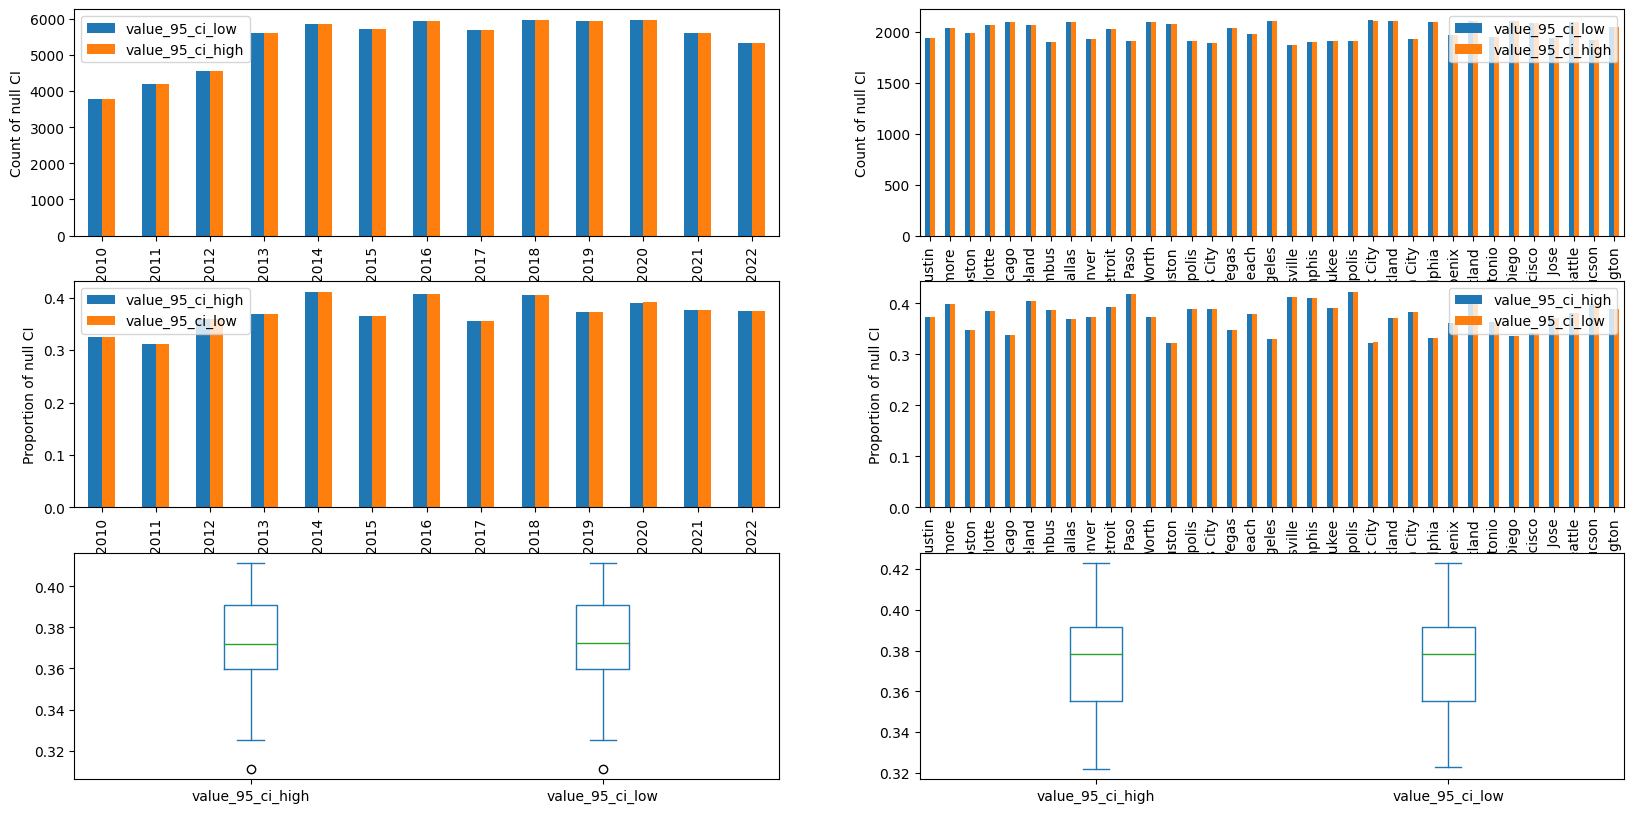

In [260]:
import seaborn as sns
import matplotlib.pyplot as plt
fig, axes = plt.subplots(3,2,figsize=(20,10))

# 연도별 CI가 null 인것 count
null_count_year = get_nullcount(df_city,"date_label",col_list)
null_count_year.plot.bar(ax=axes[0][0])
axes[0][0].set(xlabel="Year", ylabel="Count of null CI")

# 연도 별 CI가 null / 전체 비율
null_prop_year = get_nullprop(df_city,"date_label",col_list) #count_year.rdiv(null_count_year, axis=0)
null_prop_year.plot.bar(ax=axes[1][0])
null_prop_year.plot.box(ax=axes[2][0])
axes[1][0].set(xlabel="Year", ylabel="Proportion of null CI")

# 도시별 CI가 null 인것 count
null_count_city = get_nullcount(df_city,"geo_label_city",col_list) #df_city.groupby("geo_label_city")[col_list].count().rsub(df_city.groupby("geo_label_city")[col_list].size(), axis=0)
null_count_city.plot.bar(ax=axes[0][1])
axes[0][1].set(xlabel="City", ylabel="Count of null CI")

# 도시 별 CI가 null / 전체 비율
null_prop_city = get_nullprop(df_city,"geo_label_city",col_list)
null_prop_city.plot.bar(ax=axes[1][1])
null_prop_city.plot.box(ax=axes[2][1])
axes[1][1].set(xlabel="City", ylabel="Proportion of null CI")


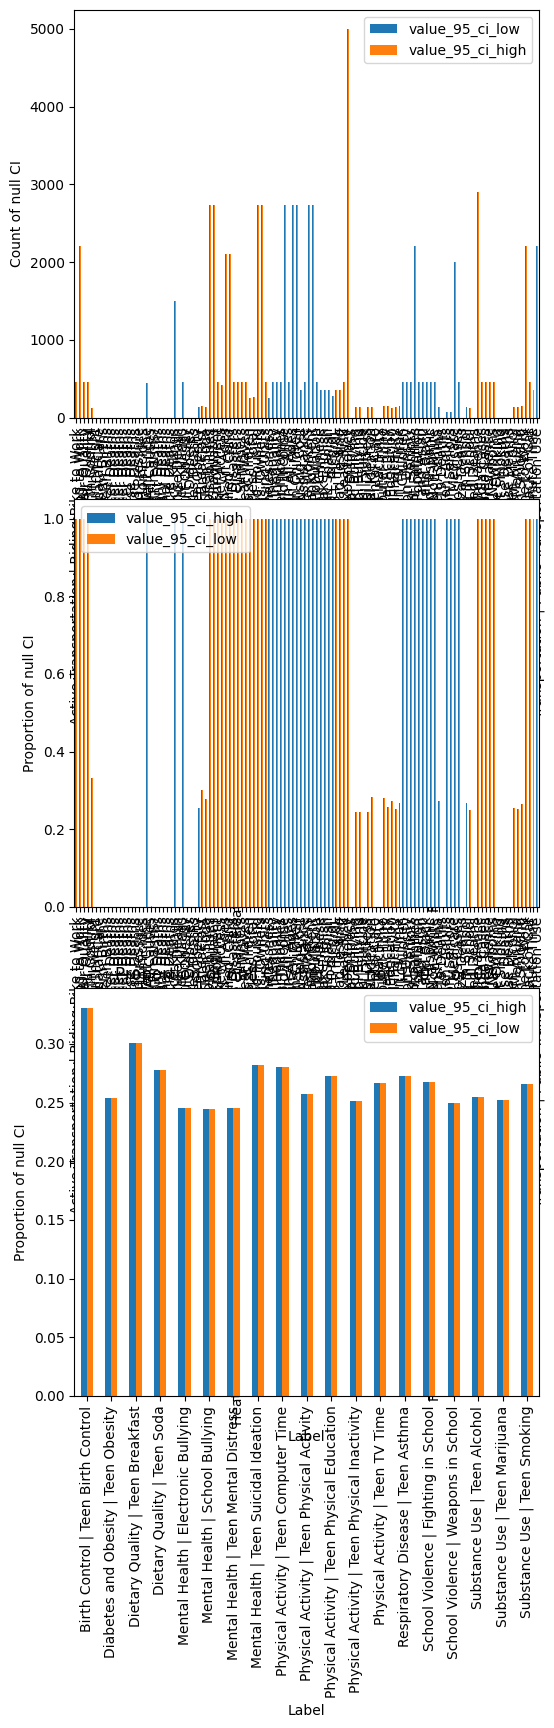

In [282]:
import seaborn as sns
import matplotlib.pyplot as plt
fig, axes = plt.subplots(3,1,figsize=(6,18))


# Metric_label 별 CI 가 null인것 count
null_count_label = get_nullcount(df_city,"metric_label",cols=col_list)
null_count_label.plot.bar(ax=axes[0])
axes[0].set(xlabel="Label", ylabel="Count of null CI")

# Metric_label 별 CI 가 null인것 비율
null_prop_label = get_nullprop(df_city,"metric_label",cols=col_list) 
null_prop_label.plot.bar(ax=axes[1])
axes[1].set(xlabel="Label", ylabel="Proportion of null CI")

# Metric_label 별 CI 가 null인것 중 0% 또는 100%가 아닌 것의 비율
null_some_label = null_prop_label[(null_prop_label['value_95_ci_high'] != 1.0) & null_prop_label['value_95_ci_high'] != 0.0]
null_some_label.plot.bar(ax=axes[2])
axes[2].set(xlabel="Label", ylabel="Proportion of null CI", title="Proportion of null CI where its not 100% or 0%")

plt.show()

In [231]:
# ci_low 와 ci_high의 null 값 갯수가 다른것
null_count_label[null_count_label['value_95_ci_high'].notna() & (null_count_label['value_95_ci_high'] != null_count_label['value_95_ci_low'])]

,value_95_ci_low,value_95_ci_high
metric_label,,
Deaths | Deaths from All Causes,12,0


In [232]:
# 
null_count_label

,value_95_ci_low,value_95_ci_high
metric_label,,
Active Transportation | Riding Bike to Work,455,455
Active Transportation | Walking to Work,2205,2205
Air Pollution | Hazardous Air Quality,454,454
Air Pollution | Poor Air Quality,454,454
Birth Control | Teen Birth Control,128,128
...,...,...
Substance Use | Teen Smoking,145,145
Transportation | Drives Alone to Work,2205,2205
Transportation | Lack of Car,455,455


In [254]:
len(null_some_label.index.to_list())

19

date_label
2010    130
2011    134
2012    344
2013     98
2014    344
2015    105
2016    344
2017     89
2018    344
2019    343
2020    343
dtype: int64


<AxesSubplot: xlabel='date_label'>

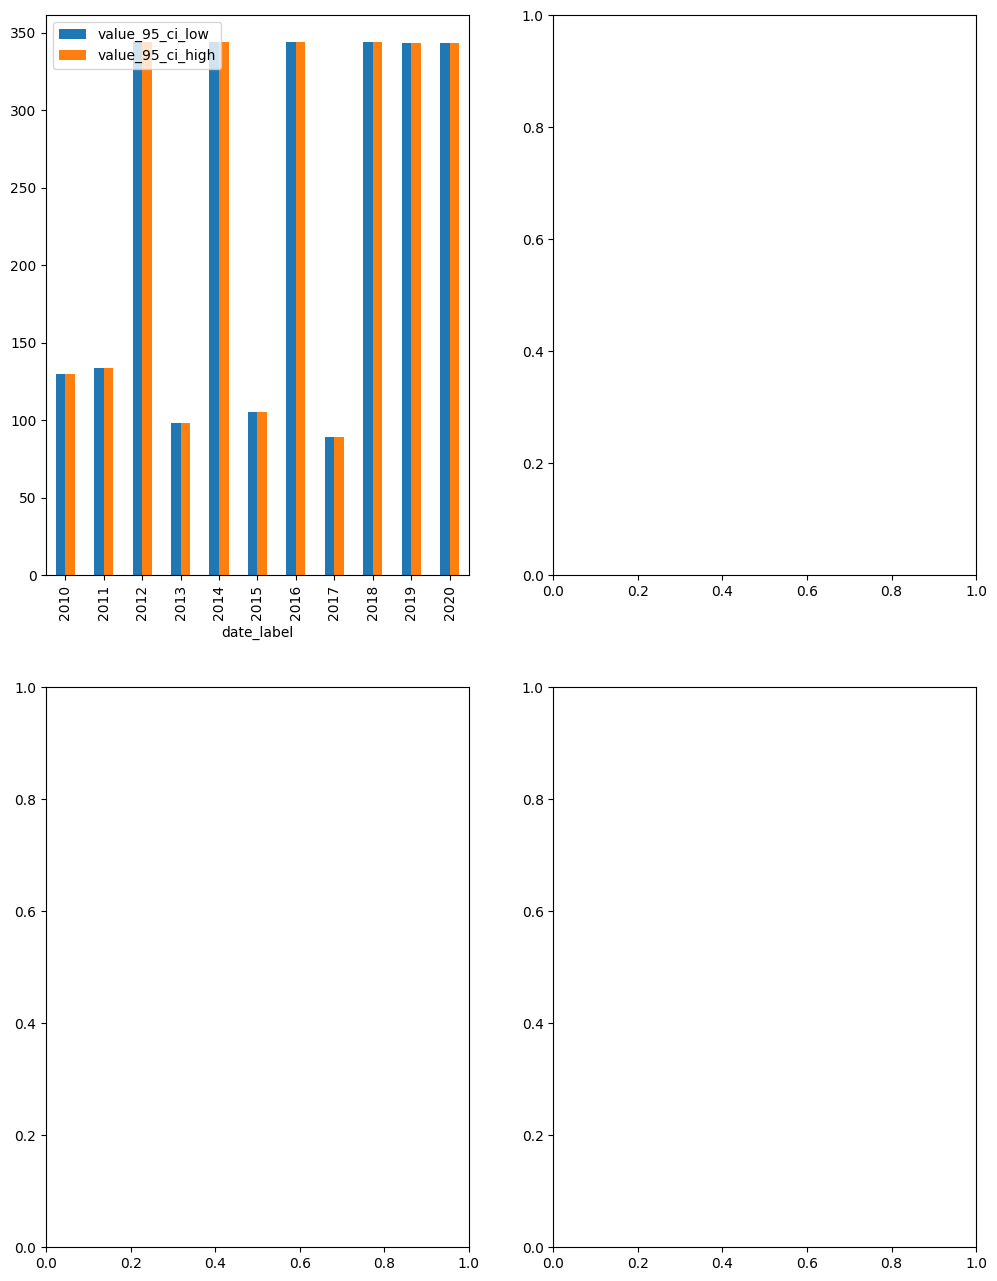

In [281]:
# CI null 비율이 0/1이 아닌것에 대한 연도/도시 세부 파악

# df_city.where(df_city["metric_label"].isin(null_some_label.index.to_list()))
# df_city[df_city["metric_label"].isin(null_some_label.index.to_list()) & df_city["value_95_ci_high"].isna()].groupby(["geo_label_city", "date_label"]).count()
fig, axes = plt.subplots(2,2,figsize=(12,16))
df_somena = df_city[df_city["metric_label"].isin(null_some_label.index.to_list()) & df_city["value_95_ci_high"].isna()]

print(df_somena.groupby("date_label").size())

get_nullcount(df_somena, "date_label", cols=col_list).plot.bar(ax=axes[0][0])
# get_nullprop(df_somena, "date_label", cols=col_list).plot.bar(ax=axes[0][1])


In [155]:
df_city.groupby("metric_label")[col_list].size()

metric_label
Active Transportation | Riding Bike to Work      455
Active Transportation | Walking to Work         2205
Air Pollution | Hazardous Air Quality            454
Air Pollution | Poor Air Quality                 454
Birth Control | Teen Birth Control               387
                                                ... 
Substance Use | Teen Smoking                     545
Transportation | Drives Alone to Work           2205
Transportation | Lack of Car                     455
Transportation | Longer Driving Commute Time     350
Transportation | Public Transportation Use      2205
Length: 118, dtype: int64

In [146]:
null_count_city.describe()


,value_95_ci_low,value_95_ci_high
count,35.000000,35.000000
mean,2005.571429,2005.228571
std,84.716581,84.279676
min,1870.000000,1870.000000
25%,1922.000000,1922.000000
50%,2023.000000,2023.000000
75%,2094.500000,2094.500000
max,2116.000000,2108.000000


In [141]:
null_prop_year.describe()

,value_95_ci_high,value_95_ci_low
count,13.000000,13.000000
mean,0.370939,0.371001
std,0.029542,0.029549
min,0.311121,0.311195
25%,0.359864,0.359943
50%,0.372131,0.372193
75%,0.390681,0.390747
max,0.411301,0.411371


In [130]:
count_city = df_city.groupby("geo_label_city")[col_list].size().to_frame()
count_city = pd.concat([count_city] * 2, axis=1)
count_city.columns = ["value_95_ci_high", "value_95_ci_low"]
count_city.rdiv(null_count_city, axis=0)
# pd.merge(df_city.groupby("geo_label_city")[col_list].size().to_frame(),df_city.groupby("geo_label_city")[col_list].size().to_frame())#.rdiv(null_count_city, axis=0)
# null_count_city

,value_95_ci_high,value_95_ci_low
geo_label_city,,
Austin,0.373605,0.373605
Baltimore,0.398549,0.398549
Boston,0.347499,0.347499
Charlotte,0.384501,0.384501
Chicago,0.337842,0.337842
Cleveland,0.404459,0.404459
Columbus,0.387813,0.387813
Dallas,0.369761,0.369761
Denver,0.373473,0.373473


In [129]:
count_city

,value_95_ci_high,value_95_ci_low
geo_label_city,,
Austin,5198,5198
Baltimore,5101,5101
Boston,5718,5718
Charlotte,5381,5381
Chicago,6210,6210
Cleveland,5113,5113
Columbus,4907,4907
Dallas,5655,5655
Denver,5157,5157
